In [25]:
# I confirm that I did not use ChatGPT or codes from the web or from past years’ assignments and that the work I submit is my own and my own only

In [26]:
#1.1
def solveTransposeMatrix(A, b):
    n = len(b)
    L, U, p = cs111.LUfactor(A)
    # U^T is now a lower triangular matrix
    y = cs111.Lsolve(U.T, b)
    # L^T is now an upper triangular matrix
    x = cs111.Usolve(L.T, y)
    # perumatation below
    z = np.zeros_like(x)
    for i in range(n):
        z[p[i]] = x[i]
    
    return z

In [27]:
#1.2
import numpy as np
import cs111

A = np.random.rand(5, 5)
b = np.random.rand(5)
print("A:", A)
print("B:", b)

x = solveTransposeMatrix(A, b)
residual_norm = np.linalg.norm(b - A.T @ x) / np.linalg.norm(b)

print("Solution x:", x)
print("Relative residual norm:", residual_norm)

A: [[0.93398222 0.25323717 0.85029514 0.07413822 0.82703022]
 [0.79090083 0.66605683 0.16445098 0.61985486 0.23144243]
 [0.90870861 0.70972189 0.48070789 0.69579028 0.91262048]
 [0.60711574 0.94865797 0.42629012 0.70721479 0.0028184 ]
 [0.06326157 0.84572678 0.26395994 0.43590866 0.28713889]]
B: [0.58797138 0.35060993 0.54394056 0.16069346 0.8434246 ]
Solution x: [ 0.56327718  0.10595992  0.24317826 -0.44813305  0.46105662]
Relative residual norm: 1.6332807091326512e-16


In [28]:
 #2
import numpy as np
import numpy.linalg as npla

def systemAnalysis(epsilon):
    A = np.array([[epsilon, 1], [1, 1]], dtype=np.float64)
    b = np.array([1 + epsilon, 2], dtype=np.float64)
    # true solution for error computation
    x_true = np.array([1, 1])
    # with pivot below
    x_piv, res_piv = cs111.LUsolve(A, b, pivoting=True)
    err_piv = npla.norm(x_piv - x_true) / npla.norm(x_true)
    # without pivot below
    x_nopiv, res_nopiv = cs111.LUsolve(A, b, pivoting=False)
    err_nopiv = npla.norm(x_nopiv - x_true) / npla.norm(x_true)
    return {
        'epsilon': epsilon,
        'with_pivoting': {
            'solution': x_piv,
            'error': err_piv,
            'residual': res_piv
        },
        'without_pivoting': {
            'solution': x_nopiv,
            'error': err_nopiv,
            'residual': res_nopiv
        }
    }

epsilons = [1e-4, 1e-8, 1e-16, 1e-20]

print("Analysis of system solution for different epsilon values:\n")
for eps in epsilons:
    result = systemAnalysis(eps)
    print(f"ε = {eps:.0e}")
    
    print("\nWith pivoting:")
    print(f"x = [{result['with_pivoting']['solution'][0]:.8e}, {result['with_pivoting']['solution'][1]:.8e}]")
    print(f"Error = {result['with_pivoting']['error']:.8e}")
    print(f"Relative residual = {result['with_pivoting']['residual']:.8e}")
    
    print("\nWithout pivoting:")
    print(f"x = [{result['without_pivoting']['solution'][0]:.8e}, {result['without_pivoting']['solution'][1]:.8e}]")
    print(f"Error = {result['without_pivoting']['error']:.8e}")
    print(f"Relative residual = {result['without_pivoting']['residual']:.8e}")
    print("\n")
print("With pivoting enabled, the LU decomposition maintains accuracy across all tested values of epsilon even for extremely small values, due to enhanced numerical stability. Without pivoting, however, the solution becomes inaccurate or may fail entirely for very small epislon values highlighting the vulnerability that exists in rounding off errors. This shows that pivoting is need to ensure reliable results.")

Analysis of system solution for different epsilon values:

ε = 1e-04

With pivoting:
x = [1.00000000e+00, 1.00000000e+00]
Error = 0.00000000e+00
Relative residual = 0.00000000e+00

Without pivoting:
x = [1.00000000e+00, 1.00000000e+00]
Error = 7.78765860e-14
Relative residual = 4.92524925e-14


ε = 1e-08

With pivoting:
x = [1.00000000e+00, 1.00000000e+00]
Error = 0.00000000e+00
Relative residual = 0.00000000e+00

Without pivoting:
x = [9.99999994e-01, 1.00000000e+00]
Error = 4.29742094e-09
Relative residual = 2.71792764e-09


ε = 1e-16

With pivoting:
x = [1.00000000e+00, 1.00000000e+00]
Error = 7.85046229e-17
Relative residual = 0.00000000e+00

Without pivoting:
x = [2.22044605e+00, 1.00000000e+00]
Error = 8.62985677e-01
Relative residual = 5.45800066e-01


ε = 1e-20

With pivoting:
x = [1.00000000e+00, 1.00000000e+00]
Error = 0.00000000e+00
Relative residual = 0.00000000e+00

Without pivoting:
x = [0.00000000e+00, 1.00000000e+00]
Error = 7.07106781e-01
Relative residual = 4.47213595

In [29]:
# 3.1
def GSSolve(A,b, tol, max_iters):
    m, n = A.shape
    assert m == n, "matrix must be same shape as square"
    bn = b.shape[0]
    assert bn == n, "rhs vector must be same size as matrix"
    # Initialize solution vector
    x = np.zeros_like(b, dtype=float)

    residual_norms = [] 
    # Initial residual norm
    r0_norm = np.linalg.norm(b)
    # loops thru the max iterations
    for iter in range(max_iters):
        x_old = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x_old[i + 1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        r = b - np.dot(A, x)
        r_norm = np.linalg.norm(r) / r0_norm
        
        # Store relative residual norm
        residual_norms.append(r_norm)
        # Check convergence
        if r_norm < tol:
            break
    return x, residual_norms


Results Summary:
------------------------------------------------------------
Method               Iterations      Final Residual 
------------------------------------------------------------
Gauss-Seidel         3654            9.97e-09
Jacobi               7332            9.99e-09
Conjugate Gradient   138             7.68e-09


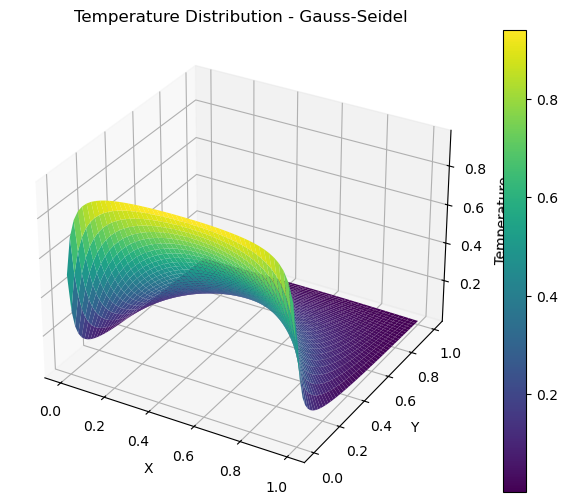

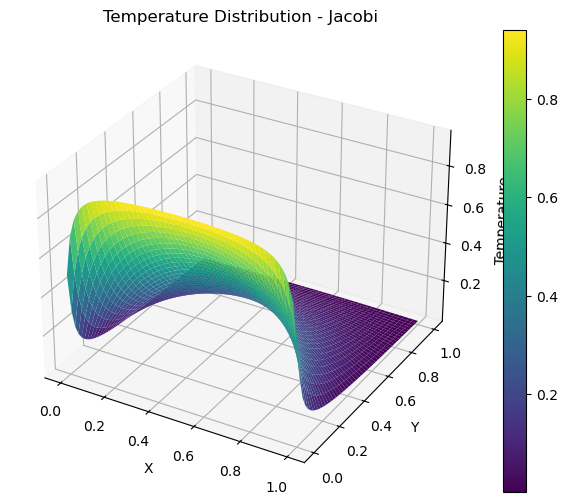

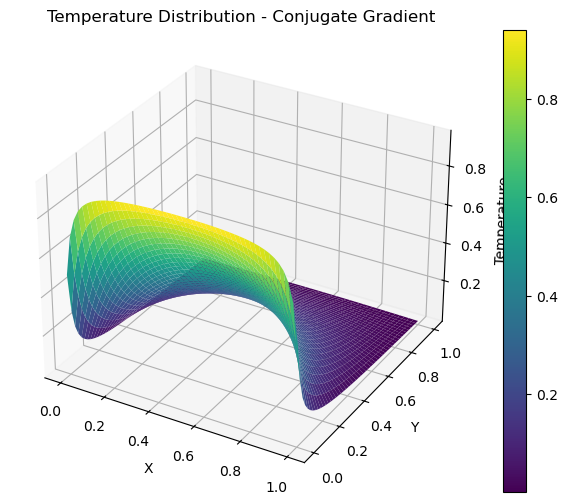

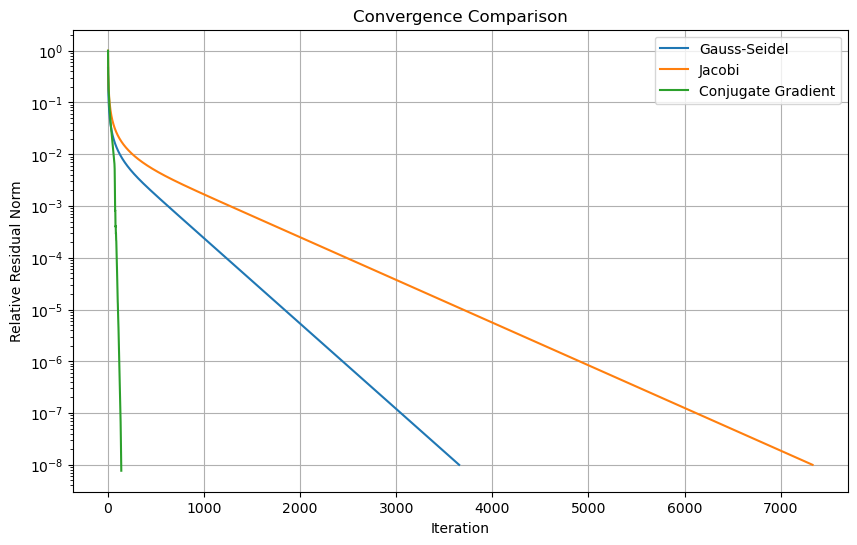



The plot above shows that Gauss-Seidel converges faster than the Jacobi method because it takes less iterations and has a relatively smaller residual norm. This is intuitive because in Gauss-Seidel, the values of the unknowns are updated as soon as they are available in a forward sweep. Jacobi, conversely, uses values from the previous iteration, which leads to slower convergence in many cases as the values lag behind. But to be precise, the exact convergence behavior depends on the matrix A, and problem at hand. 


In [30]:
# 3.2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from cs111.iterative import Jsolve, CGsolve
from scipy.sparse import csr_matrix

def temperature_setup(k):
    n = k * k
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Fill the matrix A and vector b
    for i in range(n):
        row = i // k
        col = i % k
        
        # Set diagonal
        A[i, i] = 4
        if row > 0:  
            A[i, i-k] = -1
        if row < k-1:  
            A[i, i+k] = -1
        if col > 0: 
            A[i, i-1] = -1
        if col < k-1: 
            A[i, i+1] = -1

        if row == 0:
            b[i] = 1
    C = csr_matrix(A)

    return A, b, C

def plot_solution(x, k, title):
    X = np.linspace(0, 1, k)
    Y = np.linspace(0, 1, k)
    X, Y = np.meshgrid(X, Y)
    Z = x.reshape((k, k))
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    plt.colorbar(surf)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Temperature')
    plt.show()

def compare_methods(k=50, tol=1e-8, max_iters=10000):
    A, b, C = temperature_setup(k)
    
    x_gs, res_gs = GSSolve(A, b, tol, max_iters) # function made in 3.1
    x_jacobi, res_jacobi = Jsolve(C, b, tol, max_iters) # jacobi solution
    x_cg, res_cg = CGsolve(A, b, tol, max_iters) # conjugate gradient solution
    
    methods = ['Gauss-Seidel', 'Jacobi', 'Conjugate Gradient']
    solutions = [x_gs, x_jacobi, x_cg]
    residuals = [res_gs, res_jacobi, res_cg]
    
    print("\nResults Summary:")
    print("-" * 60)
    print(f"{'Method':<20} {'Iterations':<15} {'Final Residual':<15}")
    print("-" * 60)
    
    for method, res in zip(methods, residuals):
        iterations = len(res) - 1
        final_res = res[-1]
        print(f"{method:<20} {iterations:<15d} {final_res:.2e}")
    
    for method, sol in zip(methods, solutions):
        plot_solution(sol, k, f"Temperature Distribution - {method}")
    
    # Plot convergence comparison
    plt.figure(figsize=(10, 6))
    for method, res in zip(methods, residuals):
        plt.semilogy(range(len(res)), res, label=method)
    
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.ylabel('Relative Residual Norm')
    plt.title('Convergence Comparison')
    plt.legend()
    plt.show()

compare_methods()

print("\n")
print("The plot above shows that Gauss-Seidel converges faster than the Jacobi method because it takes less iterations and has a relatively smaller residual norm. This is intuitive because in Gauss-Seidel, the values of the unknowns are updated as soon as they are available in a forward sweep. Jacobi, conversely, uses values from the previous iteration, which leads to slower convergence in many cases as the values lag behind. But to be precise, the exact convergence behavior depends on the matrix A, and problem at hand. ")